In [1]:
# Basic regression to predict fuel efficiency
# Code is based on this tutorial: https://www.tensorflow.org/tutorials/keras/regression
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # pip install pandas

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [4]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# clean data
dataset = dataset.dropna()

# convert categorical 'Origin' data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1
dataset['Europe'] = (origin == 2)*1
dataset['Japan'] = (origin == 3)*1

In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [7]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [8]:
print(dataset.tail(2))

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  USA  Europe  Japan  
396          82    1       0      0  
397          82    1       0      0  


In [9]:
print(train_dataset.tail(2))

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
145  32.0          4          83.0        61.0  2003.0          19.0   
182  28.0          4         107.0        86.0  2464.0          15.5   

     Model Year  USA  Europe  Japan  
145          74    0       0      1  
182          76    0       1      0  


In [10]:
print(test_dataset.tail(2))

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
384  32.0          4          91.0        67.0  1965.0          15.7   
396  28.0          4         120.0        79.0  2625.0          18.6   

     Model Year  USA  Europe  Japan  
384          82    0       0      1  
396          82    1       0      0  


In [11]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [12]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

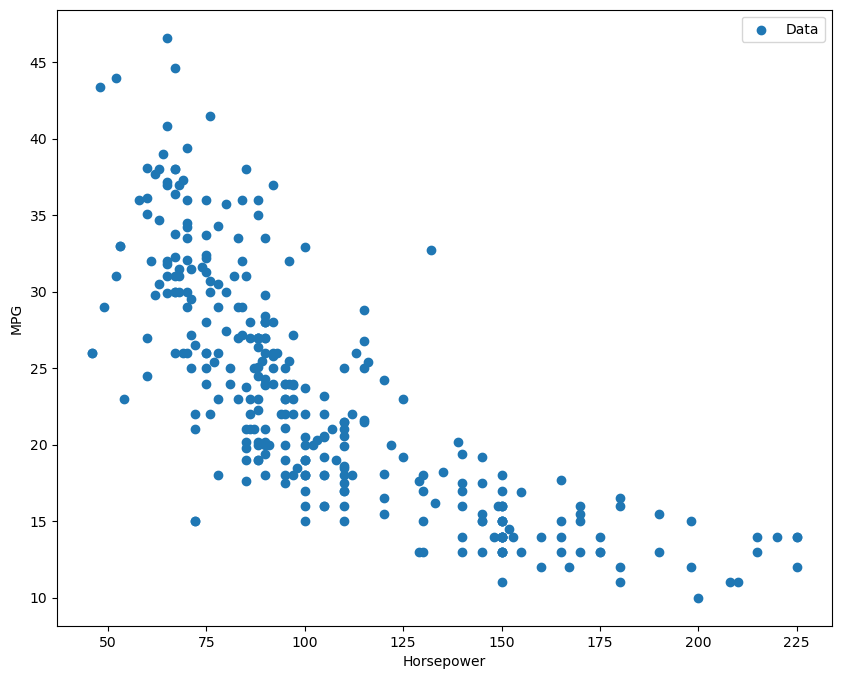

In [13]:
plot('Horsepower')

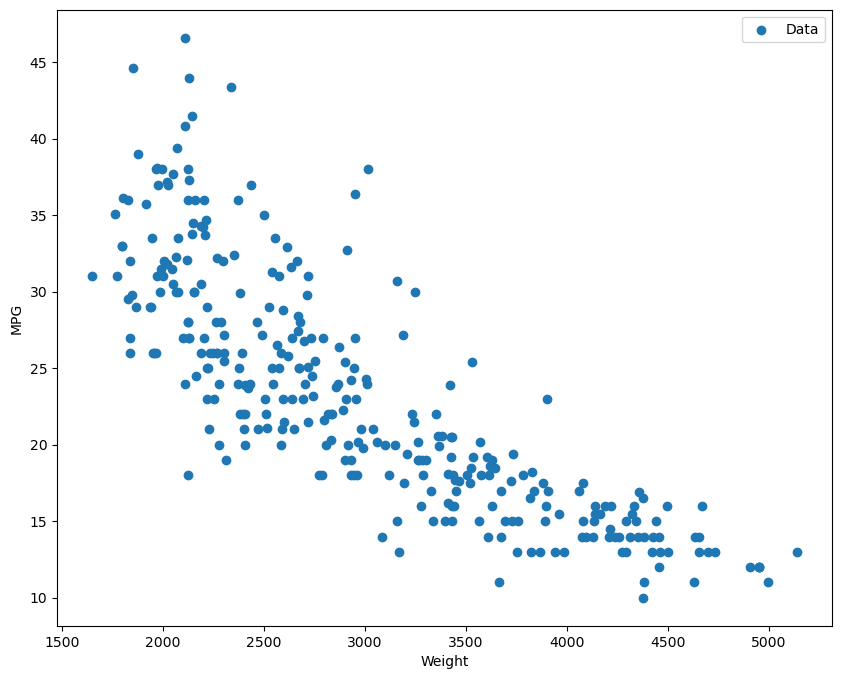

In [14]:
plot('Weight')

In [15]:
# Normalize
print(train_dataset.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()
np_all_feature=np.array(train_features)
# adapt to the data
normalizer.adapt(np_all_feature)
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
     0.197]]


In [16]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [17]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features.filter([feature]))
# single_feature = np.array(train_features[feature],dtype='float32')
print(single_feature.shape, train_features.shape)


(314, 1) (314, 9)


In [18]:

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

In [19]:
# Sequential model
single_feature_model = keras.models.Sequential([
    layers.Input(shape=(1,)),
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])

In [20]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [21]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

c:\Users\naush\.conda\envs\TensorFlowEnv\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 2s 50ms/step - loss: 22.8652 - val_loss: 22.9391
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 22.0619 - val_loss: 22.1394
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 21.2651 - val_loss: 21.3391
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 20.4606 - val_loss: 20.5391
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 19.6598 - val_loss: 19.7392
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 18.8672 - val_loss: 18.9396
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 18.0644 - val_loss: 18.1397
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 17.2629 - val_loss: 17.3404
Epoch 9/100
8/8 [==============================] - 0s 34ms/step - loss: 16.4694 - val_loss: 16.5462
Epoch 10/100
8/8 [==============================] - 0s 17ms/step - loss: 15.6808 - val_loss: 15.7591

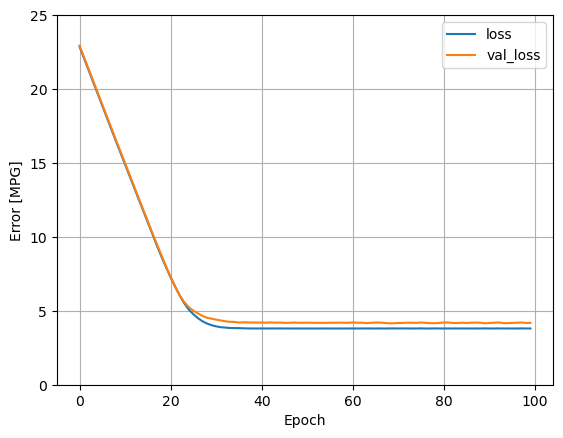

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [24]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 3.6552


3.655161142349243

7/7 [==============================] - 2s 4ms/step


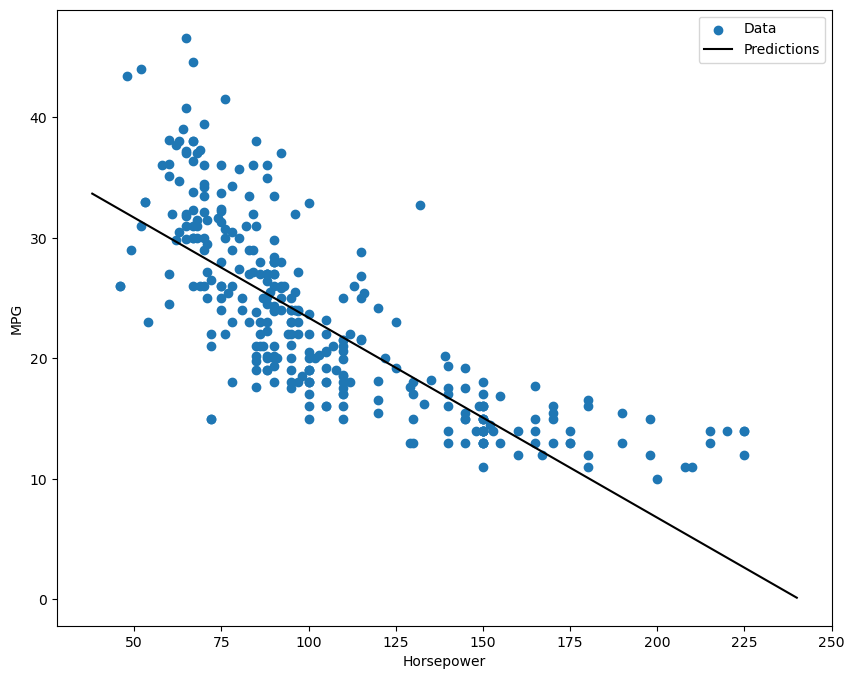

In [25]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
    
plot(feature, x,y)

In [26]:
# DNN
dnn_model = keras.Sequential([
    layers.Input(shape=(1,)),
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [27]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [28]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 4s 118ms/step - loss: 23.0200 - val_loss: 23.3766
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 22.7567 - val_loss: 23.0878
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 22.4716 - val_loss: 22.7703
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 22.1507 - val_loss: 22.3742
Epoch 5/100
8/8 [==============================] - 0s 31ms/step - loss: 21.7131 - val_loss: 21.8349
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 21.1391 - val_loss: 21.1330
Epoch 7/100
8/8 [==============================] - 0s 30ms/step - loss: 20.3843 - val_loss: 20.2368
Epoch 8/100
8/8 [==============================] - 0s 16ms/step - loss: 19.4335 - val_loss: 19.1330
Epoch 9/100
8/8 [==============================] - 0s 16ms/step - loss: 18.3064 - val_loss: 17.8616
Epoch 10/100
8/8 [==============================] - 0s 15ms/step - loss: 17.0566 - val_loss: 16.485

In [29]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 9ms/step - loss: 2.9353


2.9353384971618652

7/7 [==============================] - 0s 3ms/step


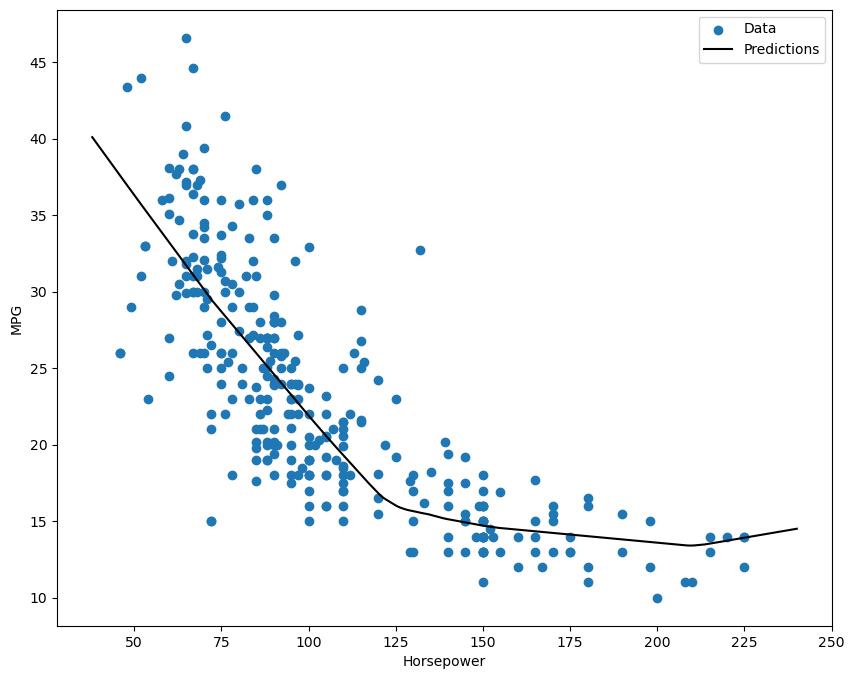

In [30]:
# predict and plot
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x,y)

In [31]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

In [32]:
linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 2s 38ms/step - loss: 22.9037 - val_loss: 23.0680
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0576 - val_loss: 22.3761
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 21.2259 - val_loss: 21.6610
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 20.3966 - val_loss: 20.8929
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 19.5746 - val_loss: 20.1503
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 18.7824 - val_loss: 19.4407
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 17.9353 - val_loss: 18.6901
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 17.1411 - val_loss: 17.9428
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 16.3816 - val_loss: 17.1979
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 15.5278 - val_loss: 16.5242
Epoch 

In [33]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 2.4942


2.494150161743164